In [23]:
%matplotlib inline
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab 
import scipy.stats as stats
#from dotenv import load_dotenv

In [24]:
#load_dotenv()

In [25]:
#os.getenv("DATASET_PATH")

In [26]:
final_df = pd.read_csv('../all_data/all-data-best-city.csv', index_col=0)

In [27]:
#final_df = pd.read_csv(os.getenv("DATASET_PATH"), index_col=0)

In [28]:
final_df.head()

,city_ascii,cost_live_rent_index,purchase_pow_index,country,mean_tmp,std_dev_temp,safety_index,pollution_index,trffic_min_index,lat,lng
0,Honolulu,80.4,74.4,United States,25.441667,1.837220,52.6,37.0,41.5,21.3294,-157.8460
1,Seattle,83.4,108.4,United States,11.316667,5.142662,45.7,34.7,46.9,47.6211,-122.3244
2,Canberra,69.1,69.1,Australia,13.141667,5.418396,72.0,26.1,43.3,-35.2931,149.1269
3,Adelaide,64.6,67.3,Australia,17.208333,4.416798,66.7,27.1,45.1,-34.9275,138.6000
4,Boston,82.0,106.6,United States,12.063636,8.341855,59.6,32.3,46.5,42.3188,-71.0852


In [29]:
final_df.columns

Index(['city_ascii', 'cost_live_rent_index', 'purchase_pow_index', 'country',
       'mean_tmp', 'std_dev_temp', 'safety_index', 'pollution_index',
       'trffic_min_index', 'lat', 'lng'],
      dtype='object')

In [30]:
#final_df = final_df.drop(['rank_cost_living', 'rank_traffic','rank_safety'], axis=1)
#final_df.head()

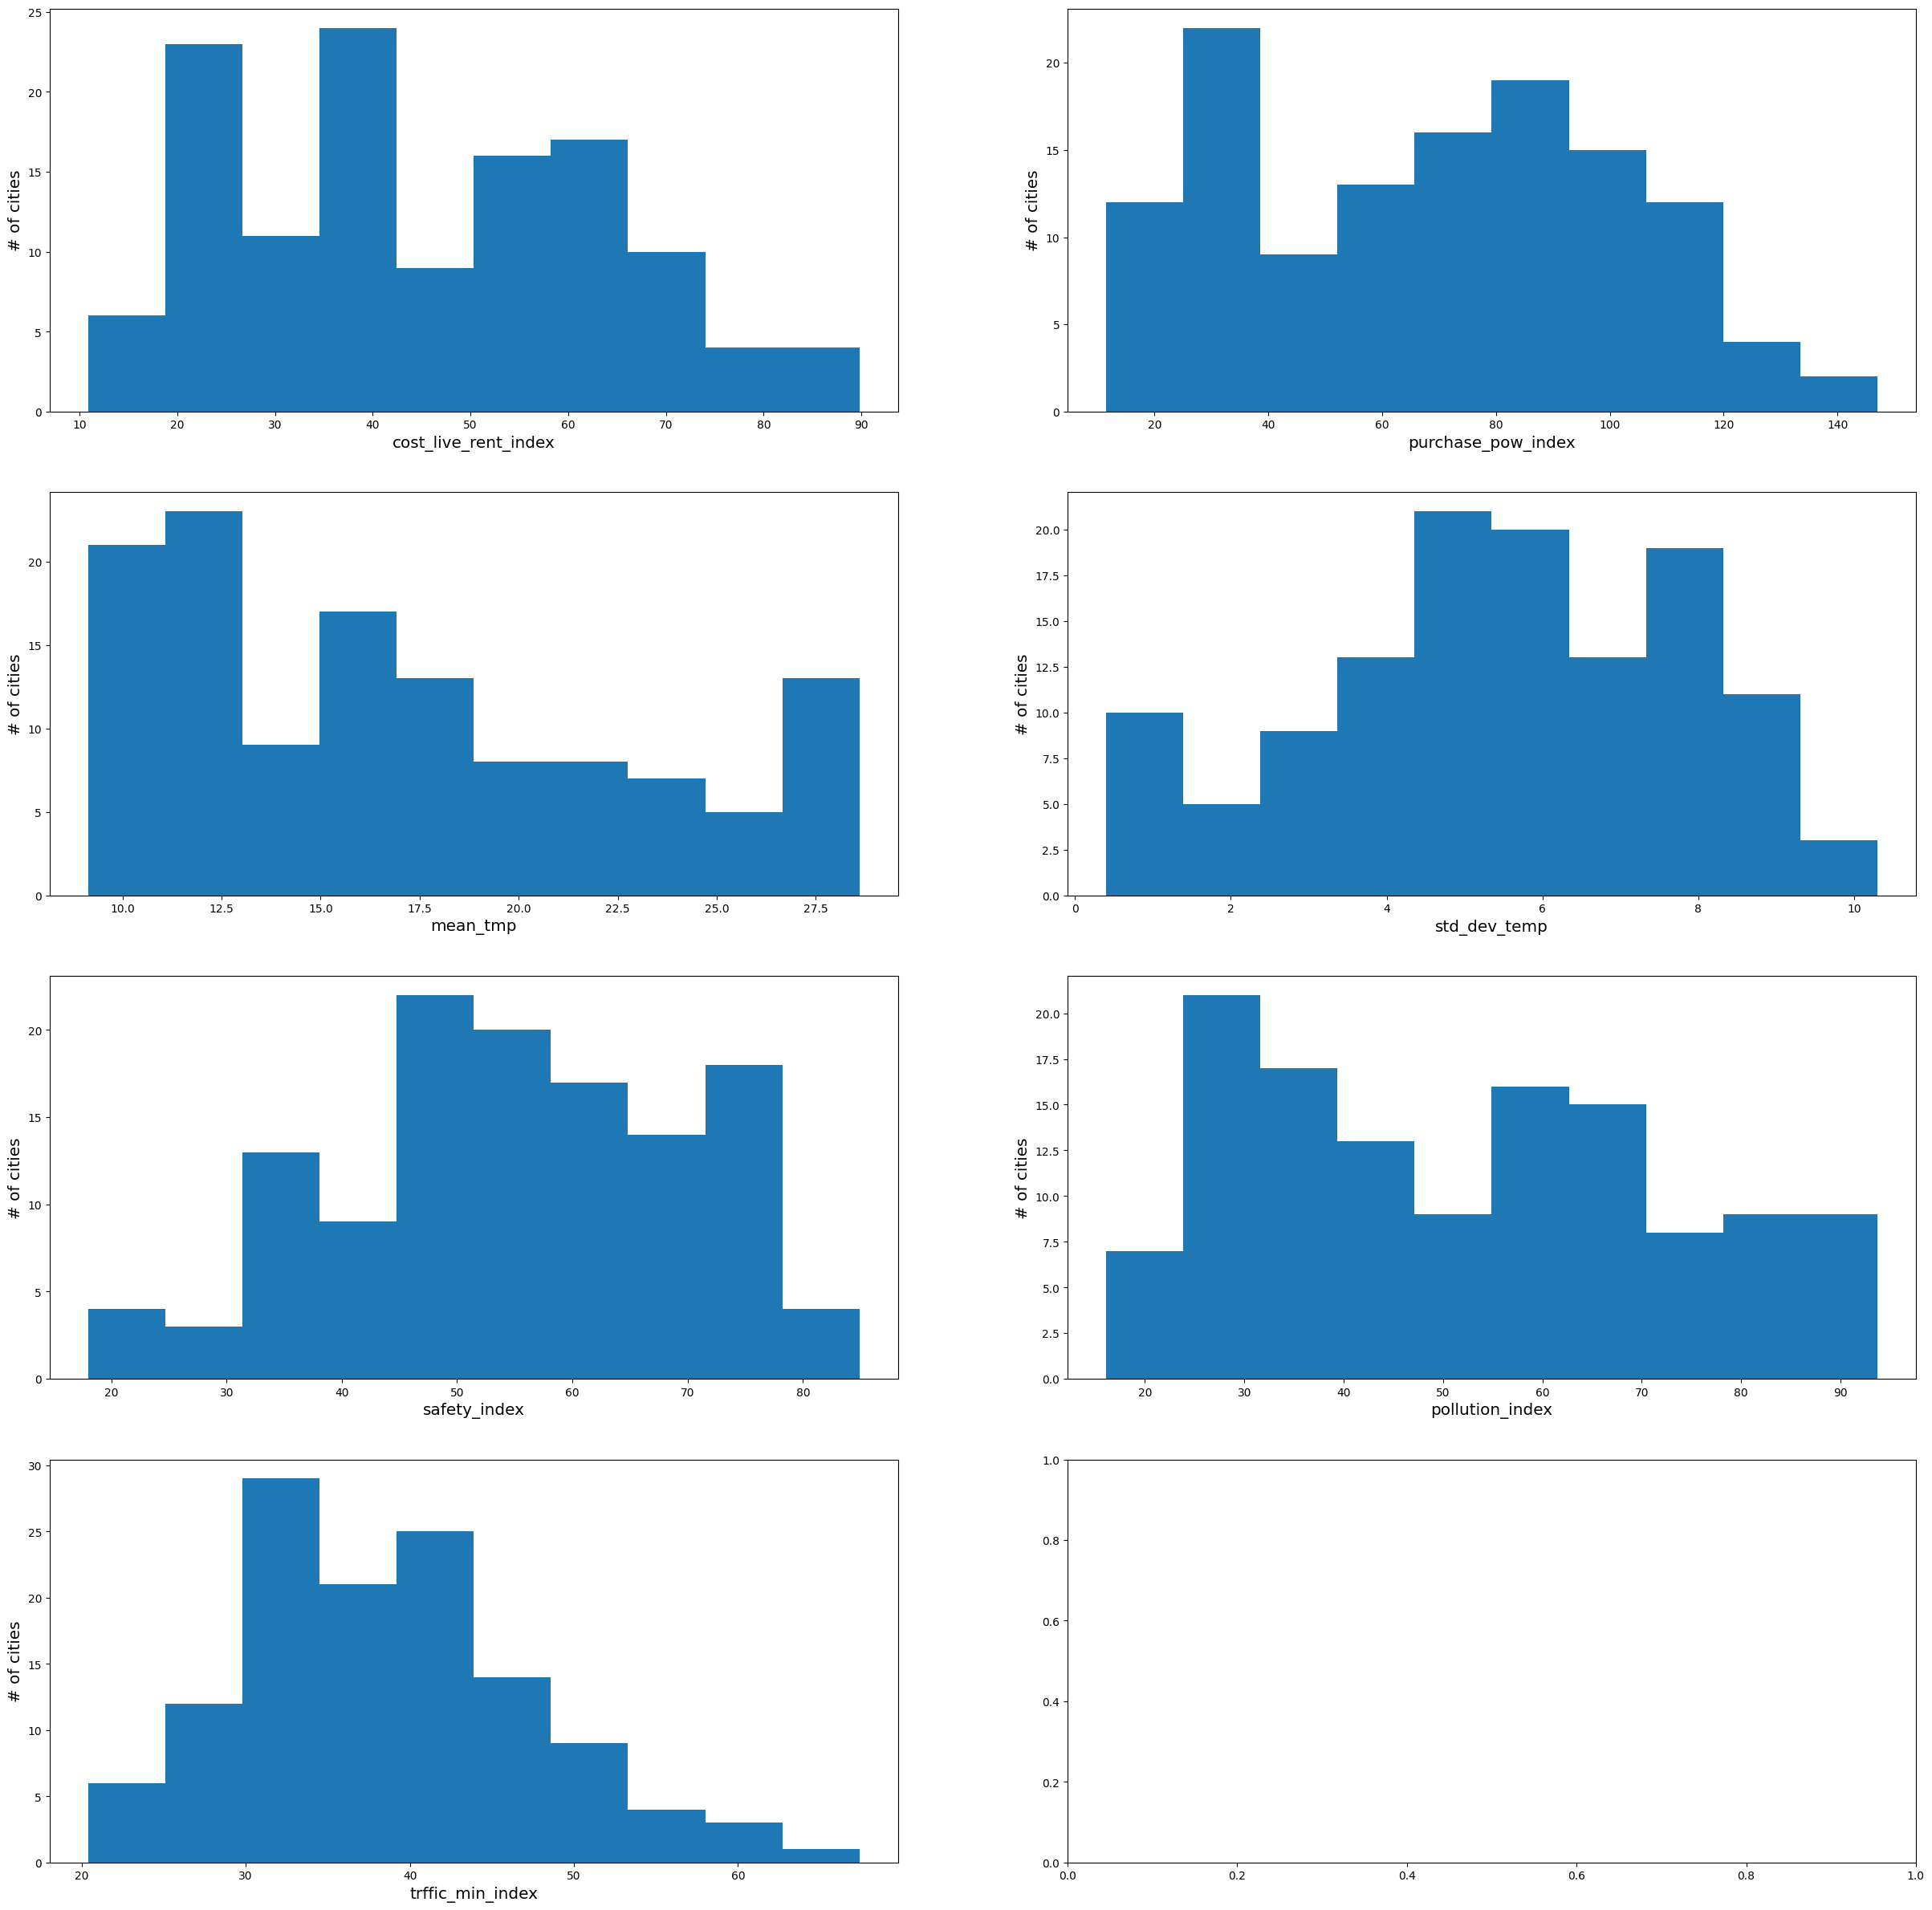

In [32]:
# Creating the figure for the 9x9 subplots
fig, axis=plt.subplots(4,2,figsize=(30,30))
axis=axis.flatten()  

# Create the list with the x labels' name for the plot
feature_names=list(final_df.columns)
feature_names.remove('country')
feature_names.remove('city_ascii')
feature_names.remove('lat')
feature_names.remove('lng')

# Loop for scatter plot
for i in range(len(feature_names)):
  axis[i].hist(final_df[feature_names[i]])
  axis[i].set_xlabel(feature_names[i],fontsize='x-large')
  axis[i].set_ylabel("# of cities", fontsize='x-large')
  
# Show the plot
plt.show()

In [33]:
#plt.savefig("hist-feature-plot.pdf")

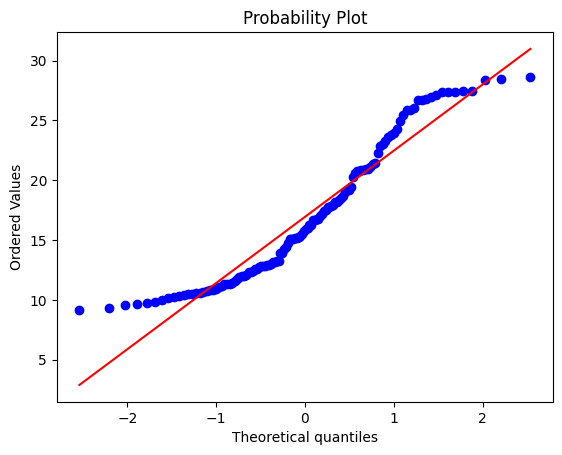

In [34]:
stats.probplot(final_df['mean_tmp'], dist="norm", plot=pylab)
pylab.show()

In [35]:
final_df['rank_cost_live_rent'] = final_df['cost_live_rent_index'].rank(ascending=False) #the lowest index has the higher score 
final_df['rank_purchase_pow'] = final_df['purchase_pow_index'].rank(ascending=True) #the lowest index has the lowest score
final_df['rank_safety'] = final_df['safety_index'].rank(ascending=True) #the lowest index has the lowest score 
final_df['rank_pollution'] = final_df['pollution_index'].rank(ascending=False) #the lowest index has the higher score
final_df['rank_traffic'] = final_df['trffic_min_index'].rank(ascending=False)

final_df.head()

,city_ascii,cost_live_rent_index,purchase_pow_index,country,mean_tmp,std_dev_temp,safety_index,pollution_index,trffic_min_index,lat,lng,rank_cost_live_rent,rank_purchase_pow,rank_safety,rank_pollution,rank_traffic
0,Honolulu,80.4,74.4,United States,25.441667,1.837220,52.6,37.0,41.5,21.3294,-157.8460,5.0,69.0,56.0,84.0,44.0
1,Seattle,83.4,108.4,United States,11.316667,5.142662,45.7,34.7,46.9,47.6211,-122.3244,2.0,110.0,31.5,87.5,22.0
2,Canberra,69.1,69.1,Australia,13.141667,5.418396,72.0,26.1,43.3,-35.2931,149.1269,14.0,62.0,105.0,113.0,34.0
3,Adelaide,64.6,67.3,Australia,17.208333,4.416798,66.7,27.1,45.1,-34.9275,138.6000,22.0,59.0,92.0,110.0,28.0
4,Boston,82.0,106.6,United States,12.063636,8.341855,59.6,32.3,46.5,42.3188,-71.0852,4.0,108.0,77.0,96.0,23.0


In [36]:
# Define variables for best mean temperature and best std deviation value
best_mean_tmp = 20
best_std_dev_tmp = 13

# Testing for temperature 
final_df['mean_tmp_diff_from_best'] = abs(best_mean_tmp - final_df['mean_tmp'])
final_df['tmp_std_dev_diff_from_best'] = abs(best_std_dev_tmp - final_df['std_dev_temp'])
#two ranking, one for average temperature, one for stand. dev.
final_df['rank_mean_tmp'] = final_df['mean_tmp_diff_from_best'].rank(ascending=False)
final_df['rank_std_dev_tmp'] = final_df['tmp_std_dev_diff_from_best'].rank(ascending=False)

final_df.head()

,city_ascii,cost_live_rent_index,purchase_pow_index,country,mean_tmp,std_dev_temp,safety_index,pollution_index,trffic_min_index,lat,lng,rank_cost_live_rent,rank_purchase_pow,rank_safety,rank_pollution,rank_traffic,mean_tmp_diff_from_best,tmp_std_dev_diff_from_best,rank_mean_tmp,rank_std_dev_tmp
0,Honolulu,80.4,74.4,United States,25.441667,1.837220,52.6,37.0,41.5,21.3294,-157.8460,5.0,69.0,56.0,84.0,44.0,5.441667,11.162780,69.0,13.0
1,Seattle,83.4,108.4,United States,11.316667,5.142662,45.7,34.7,46.9,47.6211,-122.3244,2.0,110.0,31.5,87.5,22.0,8.683333,7.857338,24.0,51.0
2,Canberra,69.1,69.1,Australia,13.141667,5.418396,72.0,26.1,43.3,-35.2931,149.1269,14.0,62.0,105.0,113.0,34.0,6.858333,7.581604,55.0,61.0
3,Adelaide,64.6,67.3,Australia,17.208333,4.416798,66.7,27.1,45.1,-34.9275,138.6000,22.0,59.0,92.0,110.0,28.0,2.791667,8.583202,97.0,38.0
4,Boston,82.0,106.6,United States,12.063636,8.341855,59.6,32.3,46.5,42.3188,-71.0852,4.0,108.0,77.0,96.0,23.0,7.936364,4.658145,35.0,111.0


In [37]:
final_df.columns

Index(['city_ascii', 'cost_live_rent_index', 'purchase_pow_index', 'country',
       'mean_tmp', 'std_dev_temp', 'safety_index', 'pollution_index',
       'trffic_min_index', 'lat', 'lng', 'rank_cost_live_rent',
       'rank_purchase_pow', 'rank_safety', 'rank_pollution', 'rank_traffic',
       'mean_tmp_diff_from_best', 'tmp_std_dev_diff_from_best',
       'rank_mean_tmp', 'rank_std_dev_tmp'],
      dtype='object')

In [40]:
wht_dict = {"wt_mean_tmp":0.5,"wt_std_dev":0.5,"wt_safety":0.8,"wt_pollution":0.4,"wt_cost_living":0.7,"wt_traffic":0.4,"wt_purchase_pow":0.6}

scores = []
for index, row in final_df.iterrows():
    s = (( row['rank_cost_live_rent']*wht_dict['wt_cost_living'] + \
        row['rank_mean_tmp']*wht_dict['wt_mean_tmp'] + \
            row['rank_std_dev_tmp']*wht_dict['wt_std_dev'] + \
                row['rank_safety']*wht_dict['wt_safety'] +\
                    row['rank_pollution']*wht_dict['wt_pollution'] +\
                        row['rank_traffic']*wht_dict['wt_traffic'] +\
                            row['rank_purchase_pow']*wht_dict['wt_purchase_pow']) / sum(wht_dict.values()))
    scores.append(s)

finding_home_df = final_df[['city_ascii','country','lat','lng']].copy()

finding_home_df['final_score'] = scores

finding_home_df = finding_home_df.sort_values(by=['final_score'], ascending=False)

finding_home_df.head()

,city_ascii,country,lat,lng,final_score
86,Valencia,Spain,39.4700,-0.3764,92.051282
80,Madrid,Spain,40.4169,-3.7033,89.615385
64,Vienna,Austria,48.2083,16.3725,86.794872
79,Riyadh,Saudi Arabia,24.6333,46.7167,84.923077
84,Muscat,Oman,23.6139,58.5922,83.615385


In [41]:
finding_home_df = finding_home_df.reset_index(drop=True)
#finding_home_df = finding_home_df.drop
finding_home_df.head()

,city_ascii,country,lat,lng,final_score
0,Valencia,Spain,39.4700,-0.3764,92.051282
1,Madrid,Spain,40.4169,-3.7033,89.615385
2,Vienna,Austria,48.2083,16.3725,86.794872
3,Riyadh,Saudi Arabia,24.6333,46.7167,84.923077
4,Muscat,Oman,23.6139,58.5922,83.615385


In [42]:
finding_home_df.to_csv('../final_ranking.csv',sep=",")

In [43]:
finding_home_df['country'] = finding_home_df['country'].str.strip()

In [44]:
print(final_df[final_df['city_ascii'] == "Lagos"].to_dict())

{'city_ascii': {129: 'Lagos'}, 'cost_live_rent_index': {129: 21.1}, 'purchase_pow_index': {129: 11.5}, 'country': {129: 'Nigeria'}, 'mean_tmp': {129: 26.808333333333334}, 'std_dev_temp': {129: 1.2176417844142482}, 'safety_index': {129: 32.0}, 'pollution_index': {129: 89.4}, 'trffic_min_index': {129: 67.4}, 'lat': {129: 6.455}, 'lng': {129: 3.3841}, 'rank_cost_live_rent': {129: 116.0}, 'rank_purchase_pow': {129: 1.0}, 'rank_safety': {129: 8.0}, 'rank_pollution': {129: 7.0}, 'rank_traffic': {129: 1.0}, 'mean_tmp_diff_from_best': {129: 6.808333333333334}, 'tmp_std_dev_diff_from_best': {129: 11.782358215585752}, 'rank_mean_tmp': {129: 57.0}, 'rank_std_dev_tmp': {129: 9.0}}


In [45]:
finding_home_df['country'].head(5).tolist()

['Spain', 'Spain', 'Austria', 'Saudi Arabia', 'Oman']

## World Map Visualization

In [21]:
#%pip install geopandas
import matplotlib.pyplot as plt
import geopandas as gpd


# Load world map shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Your data (mean temperatures per country)
data = {
    'Country': final_df['country'].to_list(),  # Replace with your countries
    'Mean_Temperature': final_df['pollution_index'].to_list()  # Replace with your mean temperatures
}

# Merge world map with data
world_data = world.merge(pd.DataFrame(data), how='left', left_on='name', right_on='Country')

# Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world_data.plot(column='Mean_Temperature', ax=ax, legend=True,
                legend_kwds={'label': "Mean Temperature", 'orientation': "horizontal"})
plt.title('Mean Temperature Across Countries')
plt.show()

ModuleNotFoundError: No module named 'geopandas'

In [22]:
import plotly.express as px
import geopy
from geopy.geocoders import Nominatim

# Initialize the geolocator
geolocator = Nominatim(user_agent="city_recsys")

# Sample user's top 5 cities (replace this with your logic to get user input)
user_cities = finding_home_df['country'].head(5).tolist()

city_coords = []
for idx, city in enumerate(user_cities, start=1):
    location = geolocator.geocode(city)
    if location:
        city_coords.append((city, location.latitude, location.longitude, idx))

# Create a DataFrame from the city coordinates
df = pd.DataFrame(city_coords, columns=["City", "Latitude", "Longitude", "Rank"])

# Define colors for different ranks
colors = px.colors.qualitative.Set1

# Plotting the cities on a world map using Plotly with different colors for each rank
fig = px.scatter_geo(df, lat='Latitude', lon='Longitude', hover_name='City', color='Rank',
                     color_discrete_sequence=colors, labels={'Rank': 'Ranking'}, title='Your Top 5 Cities to Live In')
fig.update_geos(projection_type="orthographic", showcountries=False, showcoastlines=False)
fig.update_layout(showlegend=True, coloraxis_showscale=False,
                  geo=dict(
                    showland=True,
                    showocean=True,
                    oceancolor='lightblue',
                    landcolor='lightgray',
                    projection_scale=3  # Adjust the scale for larger projection size
                    ),
                    width=800,  # Set width of the figure
                    height=800,  # Set height of the figure
                )
fig.show()

ModuleNotFoundError: No module named 'plotly'